In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz

Number of training samples 55000
Number of dimensions 784
Number of classes 784


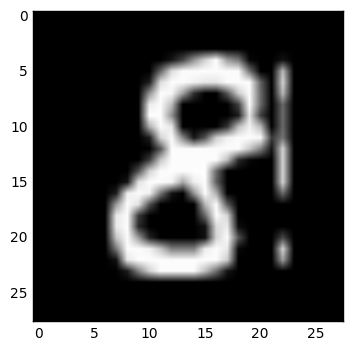

In [29]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

img = mnist.train.images[9].reshape(28, 28)
plt.imshow(img, cmap='gray')

num_train = mnist.train.num_examples
num_dims = mnist.train.images[0].shape[0]
num_classes = mnist.test.labels.shape[1]

print()
print("Number of training samples", num_train)
print("Number of dimensions", num_dims)
print("Number of classes", num_dims)

# Tensorflow

![Placeholder](placeholders.png)

In [3]:
x = tf.placeholder(tf.float32, [None, num_dims])
y = tf.placeholder(tf.float32, [None, num_classes])

# First Layer
w1 = tf.Variable(tf.zeros([784, 10]))
b1 = tf.Variable(tf.zeros([10]))
y1 = tf.matmul(x, w1) + b1

# Output
pred = tf.nn.softmax(y1)
loss = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

# Test model
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [23]:
# Train model
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)

# Initialize the variables.
init = tf.initialize_all_variables()

# Parameters
learning_rate = 0.01
training_epochs = 5
batch_size = 100
display_step = 1

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        avg_loss = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            _, l, acc = sess.run([optimizer, loss, accuracy], 
                                 feed_dict={x: batch_xs, y: batch_ys})
            
            # Compute average loss
            avg_loss += l / total_batch
            
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_loss), "accuracy=", "{:.9f}".format(acc))
            
    print("Optimization Finished!")
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Epoch: 0001 cost= 0.399879692 accuracy= 0.920000017
Epoch: 0002 cost= 0.310602466 accuracy= 0.910000026
Epoch: 0003 cost= 0.294881901 accuracy= 0.930000007
Epoch: 0004 cost= 0.286769280 accuracy= 0.889999986
Epoch: 0005 cost= 0.281118020 accuracy= 0.920000017
Optimization Finished!
Accuracy: 0.9207


# Keras

In [20]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from keras.utils import np_utils

In [21]:
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_6 (Dense)                  (None, 10)            7850        dense_input_4[0][0]              
____________________________________________________________________________________________________
activation_6 (Activation)        (None, 10)            0           dense_6[0][0]                    
Total params: 7850
____________________________________________________________________________________________________


In [22]:
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

training_epochs=5

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=training_epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 55000 samples, validate on 10000 samples
Epoch 1/5
55000/55000 [==============================] - 1s - loss: 1.2200 - acc: 0.7153 - val_loss: 0.7490 - val_acc: 0.8444
Epoch 2/5
55000/55000 [==============================] - 0s - loss: 0.6709 - acc: 0.8484 - val_loss: 0.5673 - val_acc: 0.8698
Epoch 3/5
55000/55000 [==============================] - 0s - loss: 0.5561 - acc: 0.8642 - val_loss: 0.4954 - val_acc: 0.8796
Epoch 4/5
55000/55000 [==============================] - 1s - loss: 0.5014 - acc: 0.8731 - val_loss: 0.4554 - val_acc: 0.8865
Epoch 5/5
55000/55000 [==============================] - 1s - loss: 0.4678 - acc: 0.8786 - val_loss: 0.4290 - val_acc: 0.8905
Test score: 0.429007939672
Test accuracy: 0.8905
